# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The objective of this project is to determine the significant parameters influencing used car prices from a randomly sampled used car data base(426k). Multiple models will be created in order to find the factors that consumers value the most when purchasing a used car. The results found will be useful for car dealerships to optimize their inventory and pricing for the consumers, while maximizing profit and allowing them to understand what consumers are looking for. 

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Step 1) First, I would load the dataset and use something like .head() to get a preview of the dataset.

Step 2) Use .info() and .describe() in order to see the statistics of the numerical values in the dataset.

Step 3) Check stats for numerical columns.

Step 4) Explore unique vales for categorical columns.

Step 5) Create correlation matrix for numerical features.

Step 6) Finally, identify outliers using boxplots.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Load the dataset
df = pd.read_csv('data/vehicles.csv')

# 1. Inspect the first few rows of the dataset
print(df.head())

           id                  region  price  year manufacturer model   
0  7222695916                prescott   6000   NaN          NaN   NaN  \
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive   
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN  \
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2 

In [2]:
# 2. Inspect data types and check for missing values
print(df.info())
print(df.describe())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [3]:
# 3. Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
dtype: int64


In [4]:
# 4. Explore unique values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

region: 404 unique values
manufacturer: 42 unique values
model: 29649 unique values
condition: 6 unique values
cylinders: 8 unique values
fuel: 5 unique values
title_status: 6 unique values
transmission: 3 unique values
VIN: 118246 unique values
drive: 3 unique values
size: 4 unique values
type: 13 unique values
paint_color: 12 unique values
state: 51 unique values


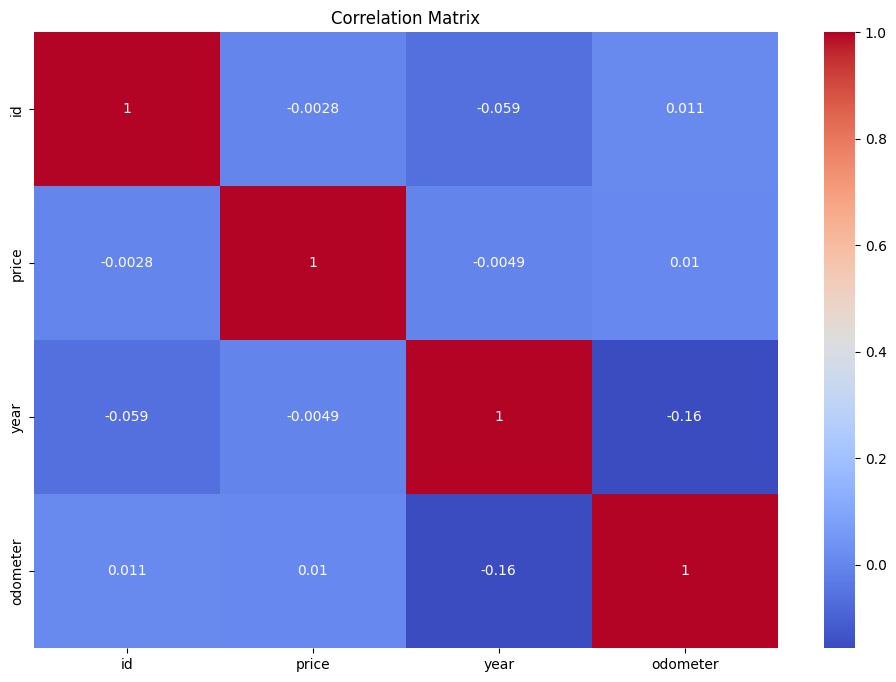

In [5]:
# 5. Correlation matrix for numerical features
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix on numerical features
corr_matrix = df[numerical_columns].corr()

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

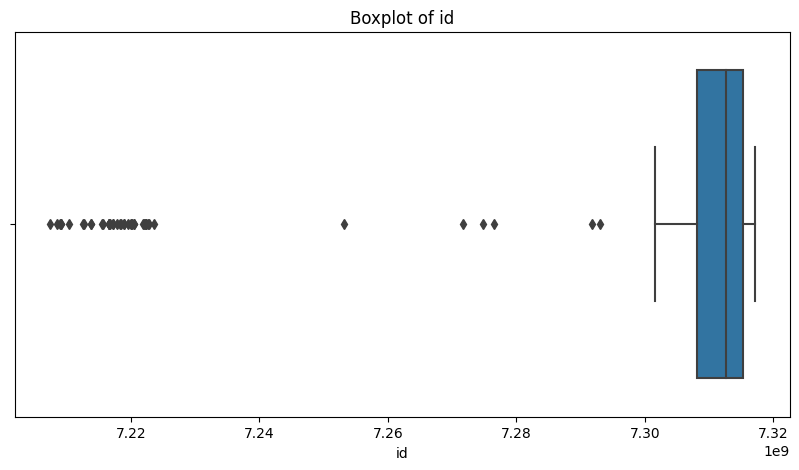

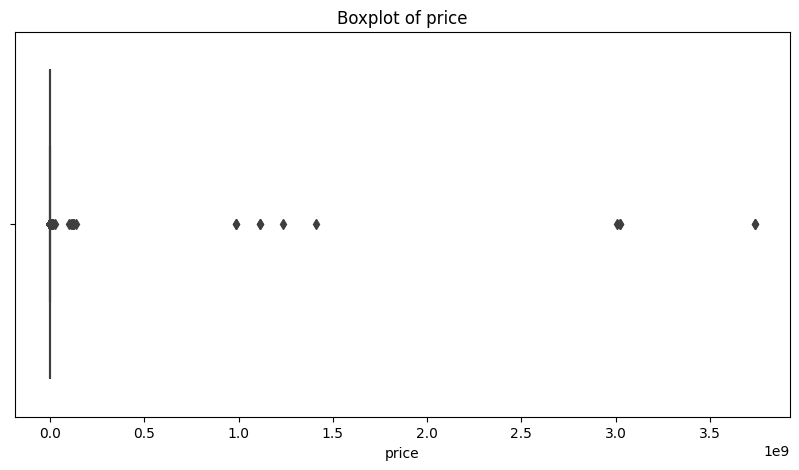

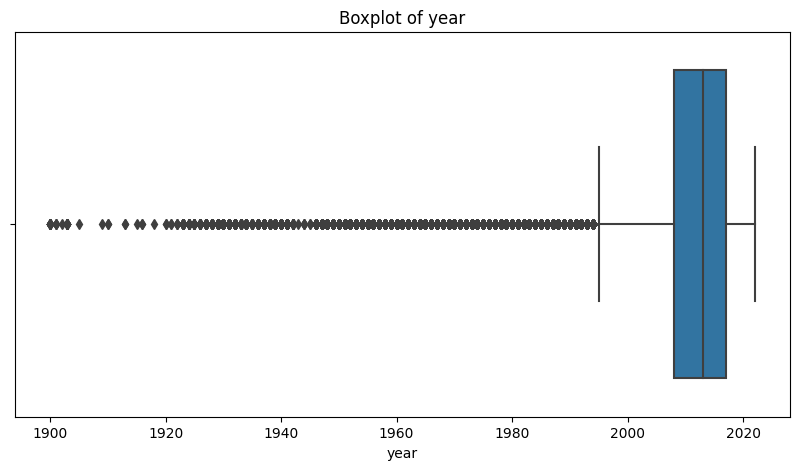

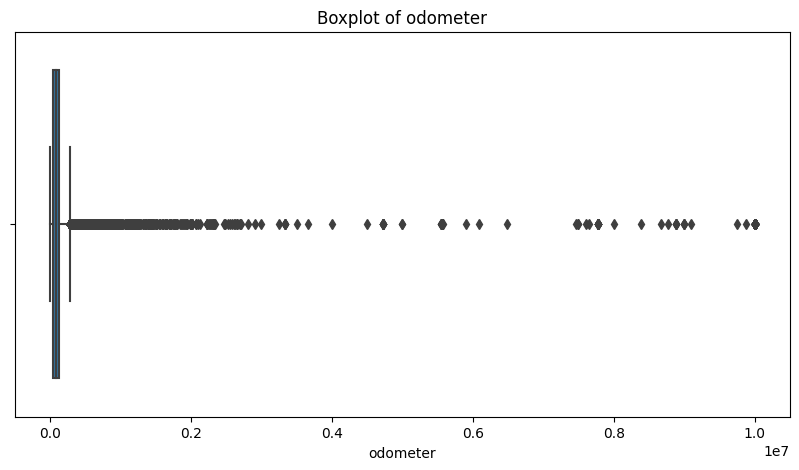

In [6]:
# 6. Identify outliers using boxplots
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [7]:
clean_df = df.dropna()

print(clean_df['price'].describe())

count     34868.000000
mean      15837.446771
std       13460.056823
min           0.000000
25%        6500.000000
50%       12000.000000
75%       22003.500000
max      155000.000000
Name: price, dtype: float64


In [8]:
print(clean_df.isnull().sum())
# No more missing values

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

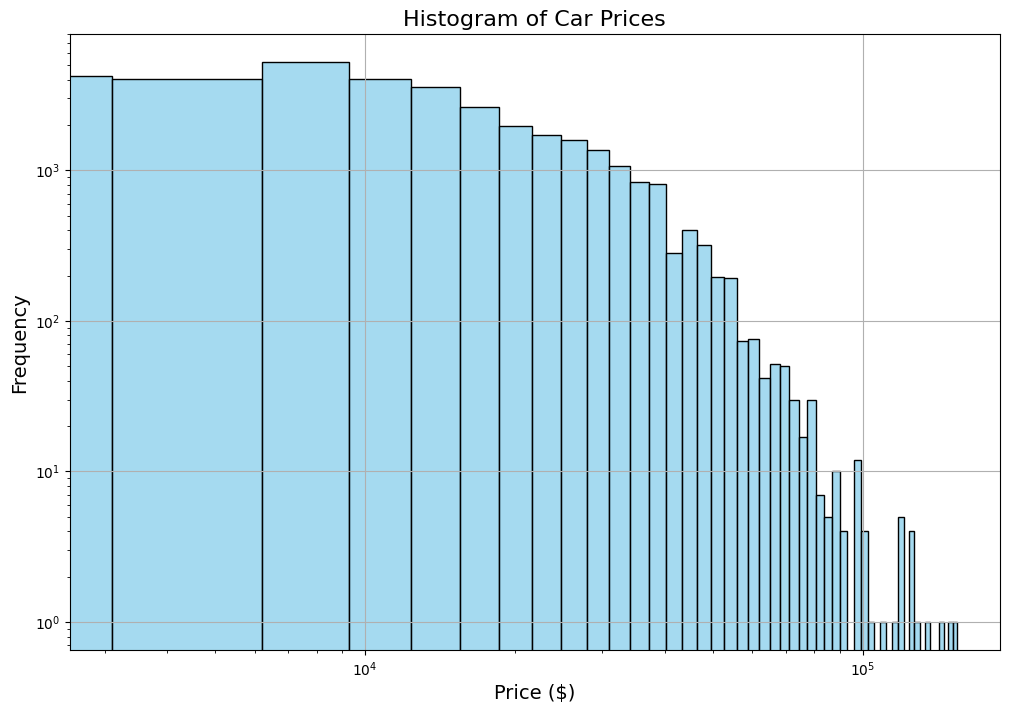

In [9]:
# Plot histogram of price
plt.figure(figsize=(12, 8))
sns.histplot(clean_df['price'], bins=50, kde=False, color='skyblue')
plt.xscale('log')
plt.yscale('log')
plt.title('Histogram of Car Prices', fontsize=16)
plt.xlabel('Price ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

#There are outliers

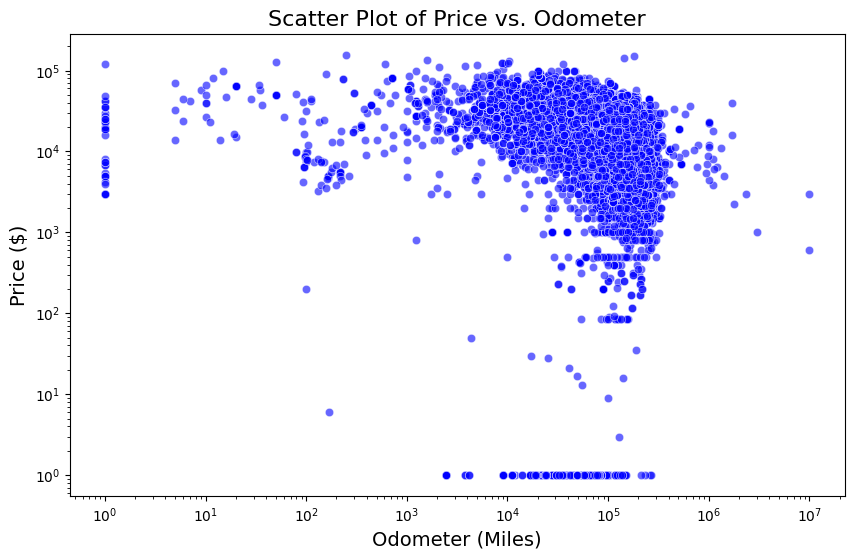

In [10]:
# Scatter plot of price vs odometer
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', data=clean_df, color='blue', alpha=0.6)
plt.xscale('log')
plt.yscale('log')

# Add title/labels
plt.title('Scatter Plot of Price vs. Odometer', fontsize=16)
plt.xlabel('Odometer (Miles)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.show()

# There are outliers

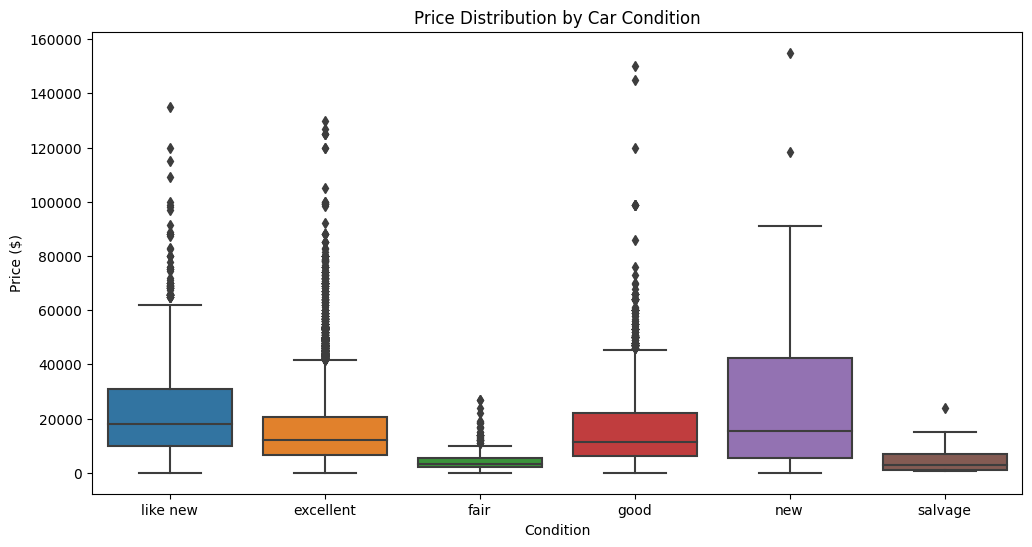

In [11]:
# Box plot of price vs. condition
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_df, x='condition', y='price')

plt.title('Price Distribution by Car Condition')
plt.xlabel('Condition')
plt.ylabel('Price ($)')
plt.show()

# 0 = Like new, 1 = excellent, 2 = fair, 3 = good, 4 = new, 5 = salvage

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# For linear regression and etc.
scaler = StandardScaler()
numerical_columns = clean_df.select_dtypes(include=['float64', 'int64']).columns
scaled_values = scaler.fit_transform(clean_df[numerical_columns])
clean_df.loc[:, numerical_columns] = scaled_values


# Initialize
label_encoder = LabelEncoder()
clean_df.loc[:, 'condition'] = label_encoder.fit_transform(clean_df['condition'])

# Initialize the label encoder
label_encoder = LabelEncoder()
categorical_columns = clean_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    clean_df.loc[:, col] = label_encoder.fit_transform(clean_df[col].astype(str))

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize models
lr_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)  
lasso_model = Lasso(alpha=1.0)  

# Fit models
lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

# Compute MSE and R^2
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Linear Regression MSE: {mse_lr}')
print(f'Linear Regression R^2: {r2_lr}')

print(f'Ridge Regression MSE: {mse_ridge}')
print(f'Ridge Regression R^2: {r2_ridge}')

print(f'Lasso Regression MSE: {mse_lasso}')
print(f'Lasso Regression R^2: {r2_lasso}')

# Cross-validation R^2 scores
def cross_val_r2(model, X, y):
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    return r2_scores

# Compute cross-validation R^2 for all models
lr_r2_scores = cross_val_r2(lr_model, X, y)
ridge_r2_scores = cross_val_r2(ridge_model, X, y)
lasso_r2_scores = cross_val_r2(lasso_model, X, y)

# Print results
print("Linear Regression R^2 scores:", lr_r2_scores)
print("Mean R^2 for Linear Regression:", lr_r2_scores.mean())

print("Ridge Regression R^2 scores:", ridge_r2_scores)
print("Mean R^2 for Ridge Regression:", ridge_r2_scores.mean())

print("Lasso Regression R^2 scores:", lasso_r2_scores)
print("Mean R^2 for Lasso Regression:", lasso_r2_scores.mean())

Linear Regression MSE: 0.7922855483674416
Linear Regression R^2: 0.24008639253366504
Ridge Regression MSE: 0.7922787194269123
Ridge Regression R^2: 0.24009294245098145
Lasso Regression MSE: 0.9962862553105307
Lasso Regression R^2: 0.0444209364891357
Linear Regression R^2 scores: [ 0.25306752  0.28704258  0.32532795 -0.35870226  0.32839733]
Mean R^2 for Linear Regression: 0.16702662724803702
Ridge Regression R^2 scores: [ 0.25306835  0.2870537   0.32532607 -0.35858148  0.32839474]
Mean R^2 for Ridge Regression: 0.16705227816406573
Lasso Regression R^2 scores: [ 0.02287283  0.03888373  0.02891428 -0.00693529  0.01744502]
Mean R^2 for Lasso Regression: 0.020236114189261346


# Findings:

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

The Ridge Regression seems to provide the best results with a mean R^2 of 0.167052, which narrowly beats out linear regression which was at 0.167026. The Lasso Regression performed very poorly and was the worst regression at 0.0202. Using five folds, Linear Regression R^2 scores: [ 0.25306752  0.28704258  0.32532795 -0.35870226  0.32839733], Ridge Regression R^2 scores: [ 0.25306835  0.2870537   0.32532607 -0.35858148  0.32839474], and Lasso Regression R^2 scores: [ 0.02287283  0.03888373  0.02891428 -0.00693529  0.01744502]. As it can be seen, Ridge has a slight edge over Linear regression while Lasso regression is performs very poorly.

Looking at the scatter plot of price vs odometer, histogram of car prices, and box plots from the data analysis,there are alot of outliers. Overall, the data was cleaned pretty well, but with more time I would have liked to revisit and potentially try and cut those outliers for more accurate results. I also would have liked to test out more categories vs price such as age of car vs price, as that would also give some additional info. Using other models such as random forests, decision tree, and etc in the future would also be very interesting and useful.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.


The condition of a car does in fact matter when it comes to pricing. As seen in the box plot shown above, cars that were like new and new obtained the best prices. When the condition gets worse, the price typically gets worse as well. 

The odometer seems to matter as well. Based off the scatter plot, alot of cars sold were form the 10^4 to 10^5 miles range.

Alot of the cars sold were priced from $20,000 and less.

Going forward, manufactorer vs price and age of car vs price should be tested to see their impact on sales. Most likely, they will have an affect on pricing.
